In [6]:
import pandas as pd

# Load the CSV data into a DataFrame without headers if you're unsure about them
df = pd.read_csv('Temp2.txt', header=None)

# Print the initial unique values in the fifth column (index 4) to verify
print("Before replacement:", df[4].unique())

# Replace 'orange' with 'green' in the fifth column
df[4] = df[4].replace('orange', 'green')

# Print the updated unique values in the fifth column to verify the replacement
print("After replacement:", df[4].unique())

# Save the modified DataFrame to a new CSV file
df.to_csv('modified_data2.txt', index=False, header=False)

print("File saved as 'modified_data.txt' with the specified changes.")


Before replacement: ['orange' 'red' 'green']
After replacement: ['green' 'red']
File saved as 'modified_data.txt' with the specified changes.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# List of filenames
#filenames = ['monte_carlo_plot3.txt', 'monte_carlo_plot2.txt', 'monte_carlo_plot10.txt','monte_carlo_plot11.txt', 
#             'monte_carlo_plot1.txt', 'monte_carlo_plot4.txt', 'monte_carlo_plot5.txt', 'monte_carlo_plot12.txt', 
#             'monte_carlo_plot7.txt', 'monte_carlo_plot8.txt', 'monte_carlo_plot9.txt']  # Add more filenames as needed

filenames = ['modified_data.txt','modified_data2.txt','MonteCarlo.txt']  # Add more filenames as needed

# Initialize an empty list to store all data
all_data = []

# Loop through each file
for filename in filenames:
    # Open and read each file
    with open(filename, 'r') as file:
        for line in file:
            # Split the line by commas and strip spaces
            values = line.strip().split(',')
            # Convert the first four elements to floats and append the color as is
            processed = [float(val) for val in values[:4]] + [values[4]]
            all_data.append(processed)

# Convert the list to a numpy array for numerical data
data_array = np.array(all_data, dtype=object)  # Use dtype=object to handle mixed types properly
#data_array = data_array1[data_array1[:, 4] != 'orange']


# Extract coordinates and colors for plotting
u2_vals = data_array[:, 0]  # First value
u4_vals = data_array[:, 2]  # Third value
u6_tilde_vals = data_array[:, 3]  # Fourth value
colors = data_array[:, 4]  # Colors

# Plotting
fig = plt.figure(figsize=(10, 7))
print(colors)  # Print colors to verify
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the provided formatting details
scatter = ax.scatter( u2_vals, u4_vals, u6_tilde_vals, c=colors, marker='o', s=15, alpha=0.8)

# Labeling the axes
ax.set_xlabel(r'$u_2$')
ax.set_ylabel(r'$u_4$')
ax.set_zlabel(r'$\tilde{u}_6$')
plt.savefig("3d fig(2).jpg")
plt.show()


['red' 'red' 'red' ... 'red' 'red' 'green']


3850


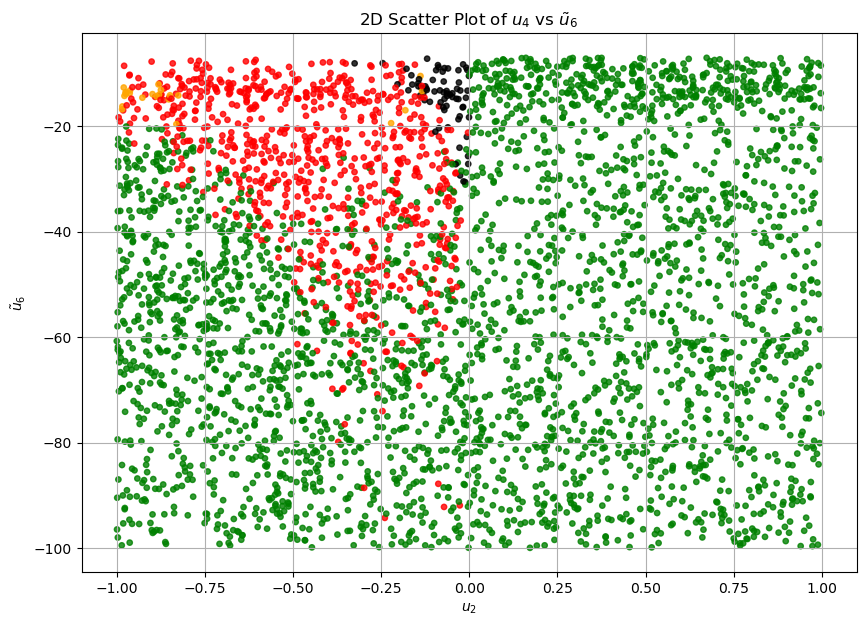

In [8]:
plt.figure(figsize=(10, 7))
print(len(u2_vals))
plt.scatter(u2_vals, u6_tilde_vals, c=colors, marker='o', s=15, alpha=0.8)
plt.xlabel(r'$u_2$')
plt.ylabel(r'$\tilde{u}_6$')
plt.title(r'2D Scatter Plot of $u_4$ vs $\tilde{u}_6$')
plt.grid(True)  # Optional: adds a grid to the plot
plt.savefig("2d fig(2).jpg")
plt.show()

<class 'numpy.float64'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


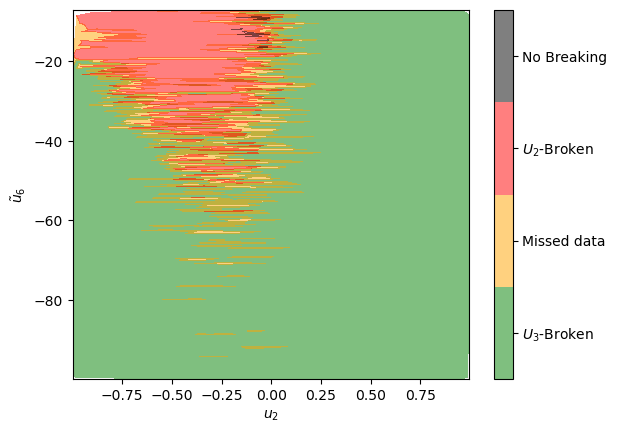

In [10]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

# Example data
x = np.random.rand(100)  # Placeholder for u2_vals
y = np.random.rand(100)  # Placeholder for u6_tilde_vals



# Discrete z values mapped to colors
z_values = ['green', 'orange', 'red', 'black']
z = np.random.choice(z_values, 100)  # Placeholder for colors
x=u2_vals
y=u6_tilde_vals
z=colors
x = np.array(x, dtype=np.float64)
y = np.array(y, dtype=np.float64)


print(type(x[1]),type(y),type(z))
# Validate and map colors to floats
color_map = {'green': 0, 'orange': 1, 'red': 2, 'black': 3}
z_numeric = []
for val in z:
    if val in color_map:
        z_numeric.append(color_map[val])
    else:
        print(f"Unexpected color value: {val}")
z_numeric = np.array(z_numeric)

# Check if any value couldn't be converted
if len(z_numeric) != len(z):
    print("Error: Not all z values could be converted. Check the input.")

# Create the Triangulation
triangulation = tri.Triangulation(x, y)

cmap = ListedColormap(['green', 'orange', 'red', 'black'])
norm = BoundaryNorm([0, 1, 2, 3, 4], cmap.N)  # Explicitly setting boundaries for each color

# Plotting the scatterplot
#plt.scatter(x, y, c=z_numeric, cmap=cmap, norm=norm)

# Creating the contour plot
contour = plt.tricontourf(triangulation, z_numeric, levels=[0, 1, 2, 3, 4], cmap=cmap, norm=norm, alpha=0.5)

plt.colorbar(contour, ticks=[0.5, 1.5, 2.5, 3.5], format=plt.FuncFormatter(lambda x, _: {0.5: r'$U_3$-Broken', 1.5: 'Missed data', 2.5: r'$U_2$-Broken', 3.5: 'No Breaking'}[x]))
plt.xlabel(r'$u_2$')
plt.ylabel(r'$\tilde{u}_6$')
plt.savefig('no_dot_triangulated.jpg')
plt.show()

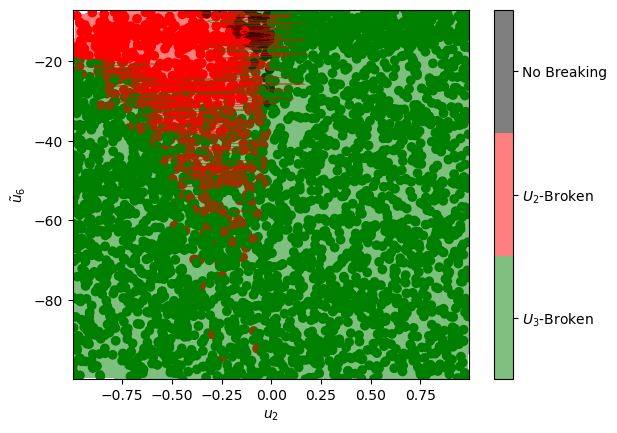

In [6]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

# Assuming x, y, and z are defined above and are available here
# z should only contain 'green', 'red', and 'black'

# Update the color map dictionary to remove orange
color_map = {'green': 0, 'red': 1, 'black': 2}
z_numeric = np.array([color_map[color] for color in z])

# Update the ListedColormap and BoundaryNorm
cmap = ListedColormap(['green', 'red', 'black'])
norm = BoundaryNorm([0, 1, 2, 3], cmap.N)  # Adjusted boundaries for three colors

# Triangulation remains the same
triangulation = tri.Triangulation(x, y)

# Plotting the scatter plot
plt.scatter(x, y, c=z_numeric, cmap=cmap, norm=norm)

# Creating the contour plot with adjusted levels to match the three colors
contour = plt.tricontourf(triangulation, z_numeric, levels=[0, 1, 2, 3], cmap=cmap, norm=norm, alpha=0.5)

# Update colorbar with new tick labels for three colors
plt.colorbar(contour, ticks=[0.5, 1.5, 2.5], format=plt.FuncFormatter(lambda x, _: {0.5: r'$U_3$-Broken', 1.5: r'$U_2$-Broken', 2.5: 'No Breaking'}[x]))
plt.xlabel(r'$u_2$')
plt.ylabel(r'$\tilde{u}_6$')
plt.savefig('triangulated(2).jpg')

plt.show()


['red' 'red' 'red' 'green' 'red' 'green' 'green' 'red' 'green' 'green'
 'green' 'green' 'red' 'red' 'red' 'red' 'green' 'red' 'red' 'green'
 'green' 'green' 'red' 'green' 'green' 'green' 'green' 'red' 'green' 'red'
 'green' 'red' 'red' 'green' 'green' 'red' 'green' 'green' 'green' 'black'
 'green' 'red' 'green' 'red' 'red' 'red' 'green' 'green' 'green' 'green'
 'green' 'red' 'red' 'red' 'green' 'red' 'red' 'green' 'red' 'green'
 'green' 'green' 'green' 'red' 'green' 'red' 'green' 'green' 'red' 'green'
 'green' 'red' 'red' 'black' 'green' 'green' 'red' 'green' 'red' 'green'
 'green' 'green' 'green' 'green' 'red' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'red' 'red' 'red' 'red' 'green' 'green'
 'red']
['red' 'red' 'red' ... 'red' 'red' 'green']


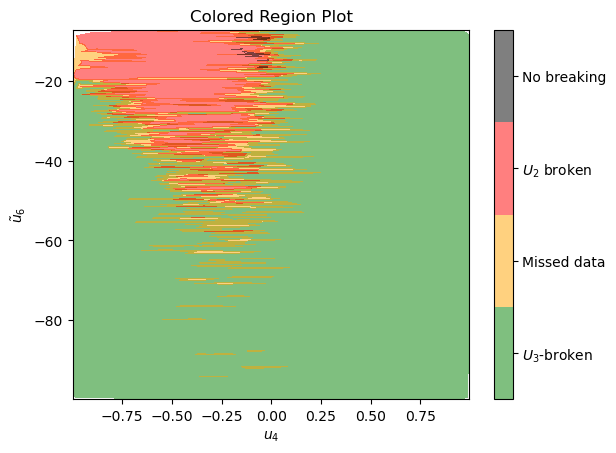

In [72]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

# Example data
x = np.random.rand(100)  # Placeholder for u2_vals
y = np.random.rand(100)  # Placeholder for u6_tilde_vals
z_values = ['green', 'orange', 'red', 'black']
z = np.random.choice(z_values, 100)  # Placeholder for colors
x = u2_vals
y = u6_tilde_vals
z = colors
print(z[:100])
x = np.array(x, dtype=np.float64)
y = np.array(y, dtype=np.float64)

# Validate and map colors to floats
color_map = {'green': 0, 'orange': 1, 'red': 2, 'black': 3}
z_numeric = []
for val in z:
    if val in color_map:
        z_numeric.append(color_map[val])
    else:
        print(f"Unexpected color value: {val}")
z_numeric = np.array(z_numeric)

# Check if any value couldn't be converted
if len(z_numeric) != len(z):
    print("Error: Not all z values could be converted. Check the input.")

# Create the Triangulation
triangulation = tri.Triangulation(x, y)

# Define a custom color map
cmap = ListedColormap(['green', 'orange', 'red', 'black'])
norm = BoundaryNorm([0, 1, 2, 3, 4], cmap.N)  # Explicitly setting boundaries for each color

# Creating the contour plot
contour = plt.tricontourf(triangulation, z_numeric, levels=[0, 1, 2, 3, 4], cmap=cmap, norm=norm, alpha=0.5)
plt.colorbar(contour, ticks=[0.5, 1.5, 2.5, 3.5], format=plt.FuncFormatter(lambda x, _: {
    0.5: r'$U_3$-broken', 
    1.5: 'Missed data', 
    2.5: r'$U_2$ broken', 
    3.5: 'No breaking'
}[x]))
print(colors)
plt.xlabel(r'$u_2$')
plt.ylabel(r'$\tilde{u}_6$')
plt.title('Colored Region Plot')
plt.savefig('no_dot_triangulated.jpg')
plt.show()


In [36]:
import plotly.graph_objects as go
import numpy as np

# Sample data: Replace 'all_data' with your actual data loading logic
# Assuming all_data is already populated as before
data_array = np.array(all_data, dtype=object)  # Make sure this matches how you process your data

# Extract u2, u4_tilde, and u6_tilde values for plotting
u2_vals = data_array[:, 0]  # u2 values
u4_tilde_vals = data_array[:, 2]  # u4_tilde values
u6_tilde_vals = data_array[:, 3]  # u6_tilde values
colors = data_array[:, 4]  # Colors

# Create the figure for a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=u2_vals,
    y=u4_tilde_vals,
    z=u6_tilde_vals,
    mode='markers',
    marker=dict(
        size=5,
        color=colors,  # Color based on the category in the color column
        opacity=0.8
    )
)])

# Update plot layout
fig.update_layout(
    title='Interactive 3D Scatter Plot',
    scene = dict(
        xaxis_title='$u_2$',
        yaxis_title='$u_4$',
        zaxis_title='$\tilde{u}_6$'
    ),
    margin=dict(l=0, r=0, b=0, t=0)  # Reduce white space around the plot
)

fig.show()


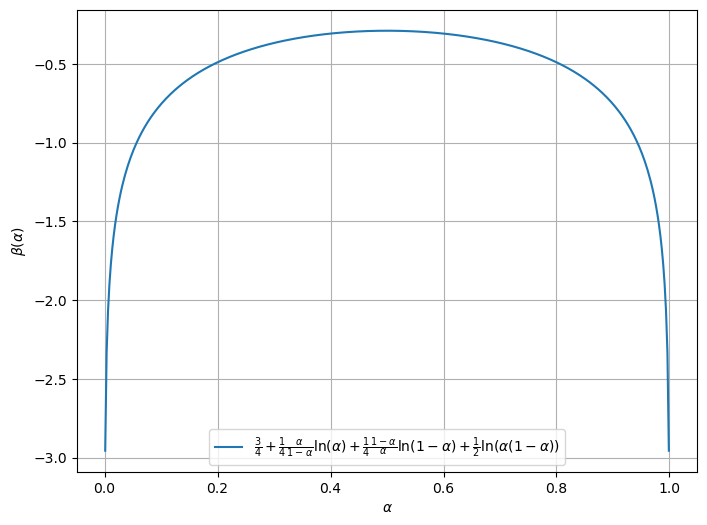

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to plot
def f(alpha):
    term1 = 3/4
    term2 = (1/4) * (alpha / (1 - alpha)) * np.log(alpha)
    term3 = (1/4) * ((1 - alpha) / alpha) * np.log(1 - alpha)
    term4 = (1/2) * np.log(alpha * (1 - alpha))
    return term1 + term2 + term3 + term4

# Generate alpha values between 0 and 1 (excluding the endpoints to avoid division by zero or log of zero)
alpha_values = np.linspace(0.001, 0.999, 400)

# Calculate the function values
y_values = f(alpha_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, y_values, label=r'$\frac{3}{4} + \frac{1}{4} \frac{\alpha}{1-\alpha} \ln(\alpha)+ \frac{1}{4} \frac{1-\alpha}{\alpha} \ln(1-\alpha) + \frac{1}{2} \ln(\alpha(1-\alpha))$')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta(\alpha)$')
plt.legend()
plt.grid(True)
plt.savefig('plot.jpg')  # Save the plot as 'plot.jpg'
plt.show()
plt.close()  # Close the plot to free up resources
